Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

$\ 2 \left( \frac{4}{1.2 \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{x-11}{1.2}\right)^2} + \frac{7}{2.4 \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{x-15}{2.4}\right)^2} \right)$

Позначимо початок і кінець робочого дня як a=9 та b=18 відповідно.

Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

### **Завдання 1**

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.*italicised text*

Візуалізація:

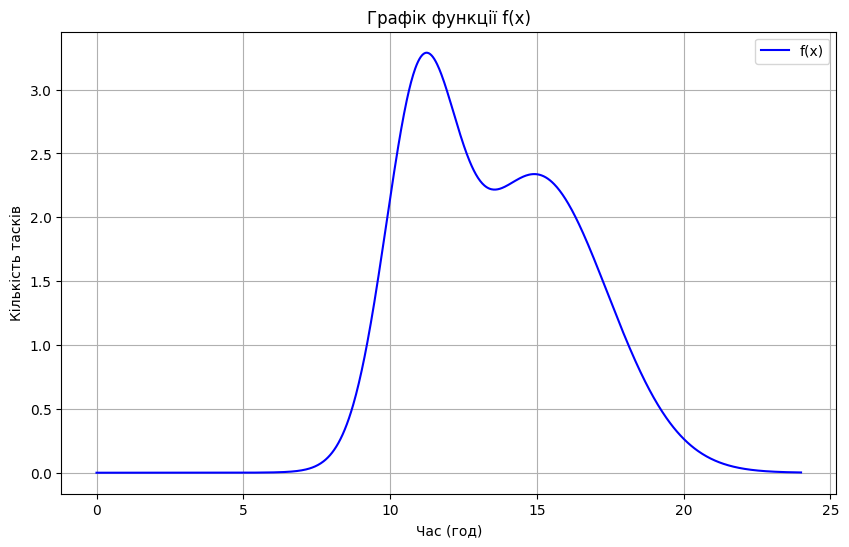

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задання функції
def f(x):
    return 2 * ((4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2) +
                (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2))

# Згенеруємо значення x на відрізку від 0 до 24
x_values = np.linspace(0, 24, 1000)
# Згенеруємо відповідні значення функції y
y_values = f(x_values)

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)', color='blue')
plt.title('Графік функції f(x)')
plt.xlabel('Час (год)')
plt.ylabel('Кількість тасків')
plt.grid(True)
plt.legend()
plt.show()

Вираховуємо інтеграли:

In [16]:
import sympy as sp

# Символьна змінна
x = sp.Symbol('x')

# Задання функції
f_expr = 2 * ((4 / (1.2 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 11) / 1.2) ** 2) +
              (7 / (2.4 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 15) / 2.4) ** 2))

# Невизначений інтеграл
indefinite_integral = sp.integrate(f_expr, x)
print("Невизначений інтеграл:", indefinite_integral)

# Інтеграл від a до b
a = 9
b = 18
definite_integral = sp.integrate(f_expr, (x, a, b))
print("Інтеграл від a до b:", definite_integral.evalf())

Невизначений інтеграл: 4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)
Інтеграл від a до b: 20.0516450141883


### **Завдання 2**

Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

In [17]:
def rectangle_method_integration(func, a, b, n):
    """
    Функція чисельного інтегрування методом прямокутників.

    :param func: Задана функція для інтегрування.
    :param a: Нижня межа інтегрування.
    :param b: Верхня межа інтегрування.
    :param n: Кількість прямокутників для апроксимації області під кривою.
    :return: Значення інтегралу.
    """
    # Ширина кожного прямокутника
    dx = (b - a) / n

    integral = 0

    for i in range(n):
        x_mid = a + i * dx + dx / 2
        integral += func(x_mid) * dx

    return integral

integral_rectangle_method = rectangle_method_integration(f, a, b, n=1000)
print("Значення інтегралу за допомогою методу прямокутників:", integral_rectangle_method)

Значення інтегралу за допомогою методу прямокутників: 20.05165035518613


### **Завдання** 3

Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.





In [18]:
def trapezoidal_method_integration(func, a, b, n):
    """
    Функція чисельного інтегрування методом трапецій.

    :param func: Задана функція для інтегрування.
    :param a: Нижня межа інтегрування.
    :param b: Верхня межа інтегрування.
    :param n: Кількість трапецій для апроксимації області під кривою.
    :return: Значення інтегралу.
    """
    # Ширина кожної трапеції
    dx = (b - a) / n

    integral = 0

    for i in range(n):
        x0 = a + i * dx
        x1 = a + (i + 1) * dx
        integral += (func(x0) + func(x1)) * dx / 2

    return integral

integral_trapezoidal_method = trapezoidal_method_integration(f, a, b, n=1000)
print("Значення інтегралу за допомогою методу трапецій:", integral_trapezoidal_method)

Значення інтегралу за допомогою методу трапецій: 20.051634332194137


### **Завдання 4**

Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.


In [19]:
def simpsons_method_integration(func, a, b, n):
    """
    Функція чисельного інтегрування методом Сімпсона.

    :param func: Задана функція для інтегрування.
    :param a: Нижня межа інтегрування.
    :param b: Верхня межа інтегрування.
    :param n: Кількість вузлів для апроксимації області під кривою.
    :return: Значення інтегралу.
    """
    # Перевірка на парність n
    if n % 2 != 0:
        raise ValueError("Кількість вузлів n повинна бути парним числом для методу Сімпсона.")

    # Ширина кожного вузла
    dx = (b - a) / n

    integral = 0

    for i in range(n // 2):
        x0 = a + 2 * i * dx
        x1 = a + (2 * i + 1) * dx
        x2 = a + (2 * i + 2) * dx
        integral += (dx / 3) * (func(x0) + 4 * func(x1) + func(x2))

    return integral

integral_simpsons_method = simpsons_method_integration(f, a, b, n=1000)
print("Значення інтегралу за допомогою методу Сімпсона:", integral_simpsons_method)


Значення інтегралу за допомогою методу Сімпсона: 20.05164501419631


### **Завдання 5**

Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [20]:
from scipy import integrate

integral_quad, error = integrate.quad(f, a, b)

print("Значення інтегралу за допомогою функції quad:", integral_quad)
print("Похибка оцінки:", error)

Значення інтегралу за допомогою функції quad: 20.051645014188296
Похибка оцінки: 1.2672390114804206e-11
